# Mnist lab 


### Using standard python libraries and the mnist csv formatted dataset.  To test different classifiers
#### * k-medoid
#### * Binary partition (Hierarchical clustering)
#### * PCoA (this is a special case of MDS)
#### * Isomap
#### * KNN

As stated in http://yann.lecun.com/exdb/mnist/, This MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 

the dataset contains 60000 datapoints with a dimensionality of 784 (60000, 784), in other words, each of the 60000 datapoints corresponds to an image of 28 by 28 represented as a 784 dimensional vector.

As an example, lets consider the first image of the dataset (the number 5) represented as the following vector:

The vector that can also be reshaped as the following (28x28) matrix:

When we visualize the matrix, we could say that only the points with a value greater than zero are the ones providing the shape of the image.

This matrix could be seen also in terms of the image's pixel composition, where the image is shaped based on the intensity of each pixel, meaning that the greater the value is, the higher the intensity will be; and in a gray scale, this variation will provide the composition as we percibe it.

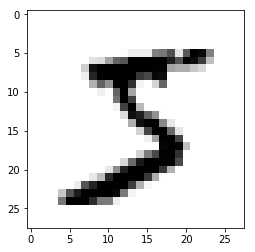

### Set the environment
1. Create the working directory called "sciencedonnees" based on the user's home
2. Download the mnist dataset in csv format.  it is also possible to download the original dataset from http://yann.lecun.com/exdb/mnist/ (gz files), decompress the files and then (a) convert the files to csv or (b) convert the files to a numpy array  

In [2]:
import urllib.request
import os
import csv

In [3]:
def set_environment(workpath, urls, files):
    ''' function to set the working directory, if it does not exist, 
        it will create it, and download the dataset'''
    if not os.path.exists(workpath):
        os.makedirs(workpath)
        
    for key, value in files.items():
        file_name = workpath+value
        print ('Downloading file: %s to %s %s' % (urls[key], file_name, '\n'))
        if os.path.isfile(file_name):
            print ('Skipping as %s already exist in %s %s' % (value, file_name, '\n') )
        else:
            download_file(urls[key], workpath+value)
            print ('done'+'\n')
    
        
def download_file(f_url,f_dest):
    '''function to download any file'''
    urllib.request.urlretrieve(f_url, f_dest)

#### If we want to use the original dataset, we can do it be defining the urls and files dictionaries as follows:

```python
urls={'train_images':'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
      'train_labels':'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
      'test_images':'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
      'test_labels':'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'}

files = {'train_images':'train-images-idx3-ubyte.gz',
         'train_labels':'train-labels-idx1-ubyte.gz',
         'test_images':'t10k-images-idx3-ubyte.gz',
         'test_labels':'t10k-labels-idx1-ubyte.gz'}
```

In [4]:
HOMEPATH = os.path.expanduser('~')
workpath = HOMEPATH+'/sciencedonnees/'
urls = {'train':'https://pjreddie.com/media/files/mnist_train.csv', 
        'test':'https://pjreddie.com/media/files/mnist_test.csv'}

files = {'train':'mnist_train.csv', 'test':'mnist_test.csv'}

set_environment(workpath, urls, files)


Skipping as mnist_train.csv already exist in /home/diego/sciencedonnees/mnist_train.csv 


Skipping as mnist_test.csv already exist in /home/diego/sciencedonnees/mnist_test.csv 



### get the train and test dataset as we need it

In [5]:
def get_dataset(ds_file):
    '''Open train and test datasets, read them and, store their records to a list'''
    with open (ds_file, 'r') as t_file:
        ds = csv.reader(t_file)
        records = []
        label = []
        dataset = []
        for line in ds:
            records.append([int(i) for i in line]) # list comprehension to convert lists' strings to ints on the fly        
        # separate col(0) - label from the rest of the list
        for line in records:
            label.append(line[0])
        for line in records:
            dataset.append(line[1:])
    return records,label,dataset

In [6]:
# get our datasets
raw_train_ds, train_labels, train_data = get_dataset(workpath+files['train'])
raw_test_ds, test_labels, test_data = get_dataset(workpath+files['test'])

In [7]:
# so far our datasets are lists, so we will transform them as numpy arrays of (60000, 784)
import numpy as np

train_data_array = np.array(train_data)
train_labels_array = np.array(train_labels)

test_data_array = np.array(test_data)
test_labels_array = np.array(test_labels)

## Dataset test:  
1. Print the first 3 labels
2. Plot the first 3 entries in the training set to validate they match the labels

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print (np.shape (train_data))

(60000, 784)


Label = 5


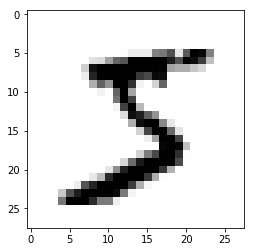

Label = 0


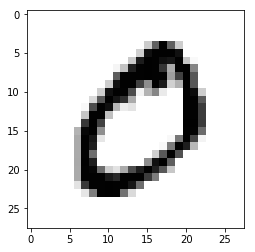

Label = 4


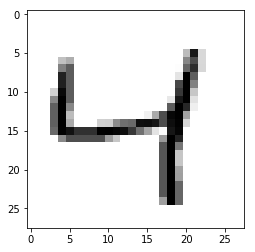

In [9]:
#reshape gives a new shape to an array without changing its data.
for i in range(0,3):
    trainsetmtx = np.reshape(train_data[i], (28,28))
    imgplot = plt.imshow(trainsetmtx, cmap=plt.cm.get_cmap("gray_r"))
    print ('Label = %s' % train_labels[i]), plt.show()

**Proposed notion of similarity

We have to define our own measure of similarity, and compare its performance to the provided measures.


In [10]:
#Define original similarity measure
import dist_norm

# K-Mean

In [11]:
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn import neighbors, metrics
from sklearn.cluster import KMeans

# Binary partition

# PCoA

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import math
import time

from sklearn.manifold import MDS
from matplotlib import offsetbox

In [13]:
# convert datasets to Numpy objects
y_train = np.asarray(train_labels)
X_train = np.asarray(train_data) 
y_test = np.asarray(test_labels) 
X_test = np.asarray(test_data)

In [34]:
# Preprocessing the data
from sklearn import preprocessing

scaler = preprocessing.Scaler().fit(X)
X_train_scaled, y_train_scaled = preprocessing.scale(X_train, y_train)

scaler.transform(X)

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


TypeError: only integer scalar arrays can be converted to a scalar index

In [14]:
pwd

'C:\\Users\\charl\\OneDrive\\CS materials\\GitHub ressources\\sciencedonnees\\MNIST'

In [26]:

n_batches = 1000 # size of batch
import dist_norm
#Distance matrix
D = dist_norm.dist_norm.norm_distance(X_train[:n_batches,:])

Processed 100 percent of 499500.
Processing has completed!


Processing...
[206777884895.06339, 107409293260.22243, 69154548871.146942, 49945866138.619019, 38746616011.523186, 31786485512.2169, 26917667523.39357, 23351270626.246159, 20632425293.391869, 18435479302.122353, 16823457792.922264, 15328935149.257984, 14232958143.499763, 13192382962.591507, 12363903310.57102, 11627131669.930889, 10907624388.875345, 10421156127.174219, 9896451177.5948467, 9481377660.3997803, 9077902946.138607, 8678210247.0598679, 8342084454.0895519, 8060799613.3026857, 7772877944.332984, 7529698768.4629421, 7298809135.8700771, 7051357764.9191771, 6854840437.805829, 6669410618.8575287, 6489354147.8380709]


Text(0,0.5,'stress')

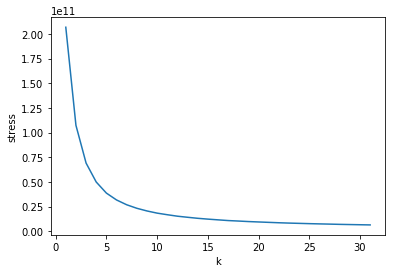

In [27]:
#optimal number of components
k_range = range(1, min(round(math.sqrt(n_batches)), D.shape[0]-1))

print("Processing...")
'''
for k in k_range:
    stress = MDS(dissimilarity='precomputed', n_components=k,
            random_state=42, max_iter=300, eps=1e-9).fit(D).stress_
    print("Processed %d percent of %d." %(round(100*k/len(k_range)), len(k_range)),   end='\r')
print('\n')        
print("Processing has completed!") 
'''          
stress = [MDS(dissimilarity='precomputed', n_components=k,random_state=42, max_iter=300, eps=1e-9).fit(D).stress_ for k in k_range]
print(stress)
plt.plot(k_range, stress)
plt.xlabel("k")
plt.ylabel("stress")

#print("K = %f" %arg_min(stress[k]))
# n_comp = 10

In [28]:
# specifying the optimal number of components to be considered.
n_comp = 2

In [29]:
X_train.shape

(60000, 784)

In [32]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

'''    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        print(shown_images)
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)'''
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


IndentationError: unexpected indent (<ipython-input-32-f06483280c0b>, line 27)

In [33]:
# Fitting the PCoA model with the original similarity measure.

y = y_train
pcoa_norm = MDS(dissimilarity = 'precomputed', n_components=n_comp, n_init=100, max_iter=500)
X_transf_norm = pcoa_norm.fit_transform(D) #,y_train[:n_batches]


#plot_embedding(X_transf_norm,"NORMALIZED - MDS embedding of the digits (time %.2fs)" ) #%(time() - t0)

In [ ]:
# Fitting the PCoA model with the Euclidean distance measure of similarity.

pcoa_eucl = MDS(dissimilarity = 'euclidean', n_components=n_comp, n_init=100, max_iter=500)
X_transf_eucl = pcoa_eucl.fit_transform(X_train[:n_batches,:]) #,y_train[:n_batches]

plot_embedding(X_transf_eucl,"EUCLIDE - MDS embedding of the digits (time %.2fs)" ) #%(time() - t0)

In [35]:
# Comparing the stress functions
print("Error with normaliz_dist: %d" %pcoa_norm.stress_)
print("Error with eucl_distance: %d" %pcoa_eucl.stress_)


Error with normaliz_dist: 106928382640
Error with eucl_distance: 110885793


In [36]:
pwd

'C:\\Users\\charl\\OneDrive\\CS materials\\GitHub ressources\\sciencedonnees\\MNIST'

# Isomap

In [10]:
from sklearn import manifold

#x_axis = train_data_array[label_data == 7]
x_axis = train_data_array[train_labels_array == 7]
y_axis = manifold.Isomap(n_neighbors=5, n_components=2).fit_transform(x_axis)

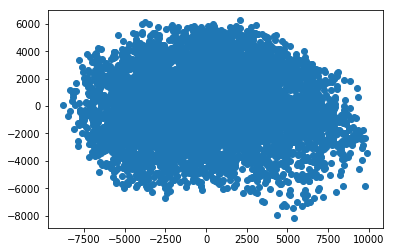

In [11]:
plt.scatter(y_axis[:,0], y_axis[:,1])

### Now, lets take a subset of our data to fully plot it
we are using only a subset of the data (1/30) as processing the full dataset (Isomap().fit_transform()) could either: 
1. take long time when running in an standalone workstation (laptop)
2. fail because of out of memory error

In [12]:
imap_data = train_data_array[::30]
imap_label = train_labels_array[::30]
view = manifold.Isomap(n_neighbors=5, n_components=2).fit_transform(imap_data)

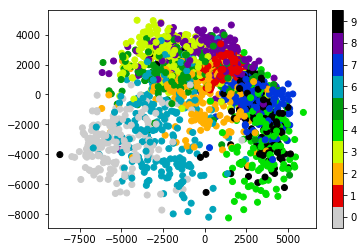

In [13]:
plt.scatter(view[:, 0], view[:, 1], c=imap_label, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

### http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap


### use only 1/30 of the data: full dataset takes a long time!

In [14]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(trainsetmtx.data)
proj.shape

(28, 2)

In [15]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

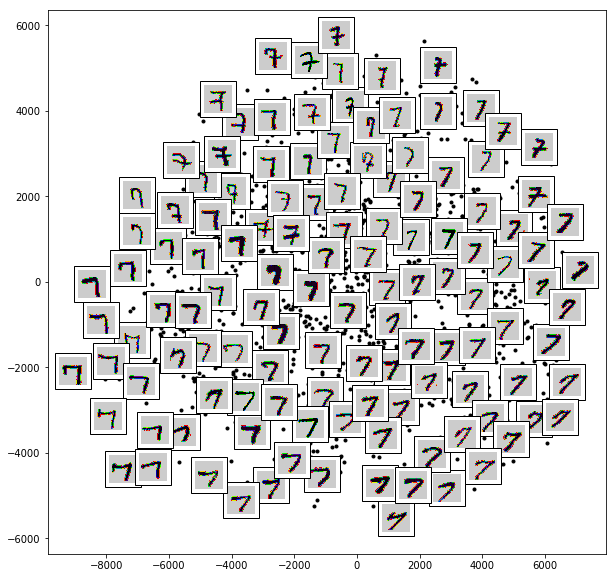

In [16]:
from sklearn.manifold import Isomap

# Choose 1/4 of the "1" digits to project
data = train_data_array[train_labels_array == 7][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='nipy_spectral_r')

# KNN

In [ ]:
#http://scikit-learn.org/stable/modules/neighbors.html
from sklearn.neighbors import NearestNeighbors